# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = '../datasets/traffic-signs-data/train.p'
validation_file= '../datasets/traffic-signs-data/valid.p'
testing_file = '../datasets/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

assert(n_validation == len(y_valid))
assert(n_test == len(y_test))
assert(n_classes == len(set(y_test)) == len(set(y_valid)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

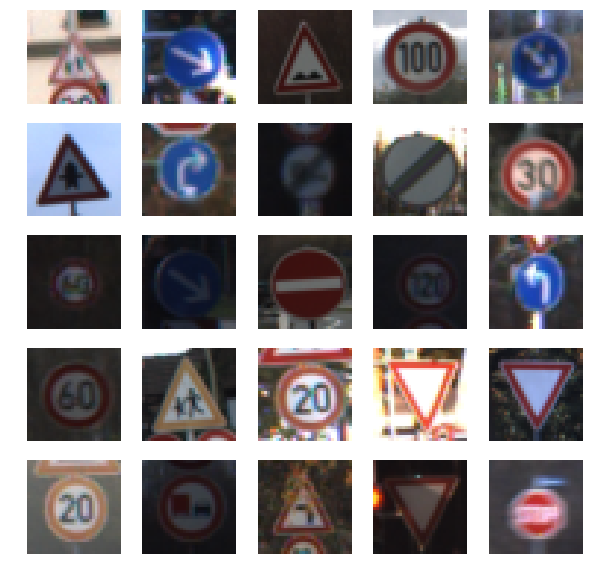

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

n_rows = 5
n_cols = 5

fig, axes1 = plt.subplots(n_rows,n_cols,figsize=(10,10))
for j in range(n_rows):
    for k in range(n_cols):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i:i+1][0])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a **validation set accuracy of about 0.89**. **To meet specifications, the validation set accuracy will need to be at least 0.93**. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

<Container object of 1 artists>

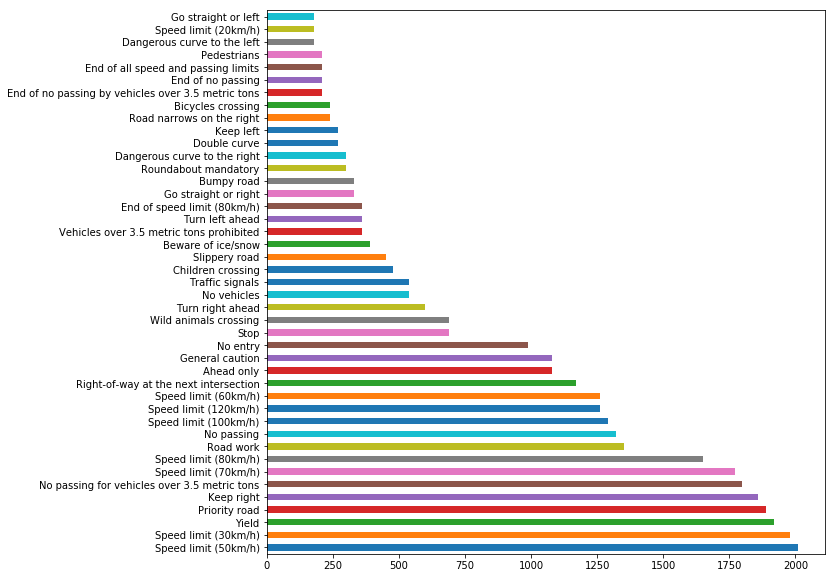

In [4]:
# Visualizing the Dataset

import pandas as pd
import csv

reader = csv.reader(open('signnames.csv', 'r'))

class_dict = {k: v for k, v in reader if k.isdigit()}
pd.value_counts([class_dict[str(y)] for y in y_train]).plot(kind="barh", figsize=(10, 10)).bar(10, 0)


In [5]:
for k in sorted(class_dict.keys(), key=int):
    print("{0}  {1}".format(k, class_dict[k]))

0  Speed limit (20km/h)
1  Speed limit (30km/h)
2  Speed limit (50km/h)
3  Speed limit (60km/h)
4  Speed limit (70km/h)
5  Speed limit (80km/h)
6  End of speed limit (80km/h)
7  Speed limit (100km/h)
8  Speed limit (120km/h)
9  No passing
10  No passing for vehicles over 3.5 metric tons
11  Right-of-way at the next intersection
12  Priority road
13  Yield
14  Stop
15  No vehicles
16  Vehicles over 3.5 metric tons prohibited
17  No entry
18  General caution
19  Dangerous curve to the left
20  Dangerous curve to the right
21  Double curve
22  Bumpy road
23  Slippery road
24  Road narrows on the right
25  Road work
26  Traffic signals
27  Pedestrians
28  Children crossing
29  Bicycles crossing
30  Beware of ice/snow
31  Wild animals crossing
32  End of all speed and passing limits
33  Turn right ahead
34  Turn left ahead
35  Ahead only
36  Go straight or right
37  Go straight or left
38  Keep right
39  Keep left
40  Roundabout mandatory
41  End of no passing
42  End of no passing by vehic

Using TensorFlow backend.


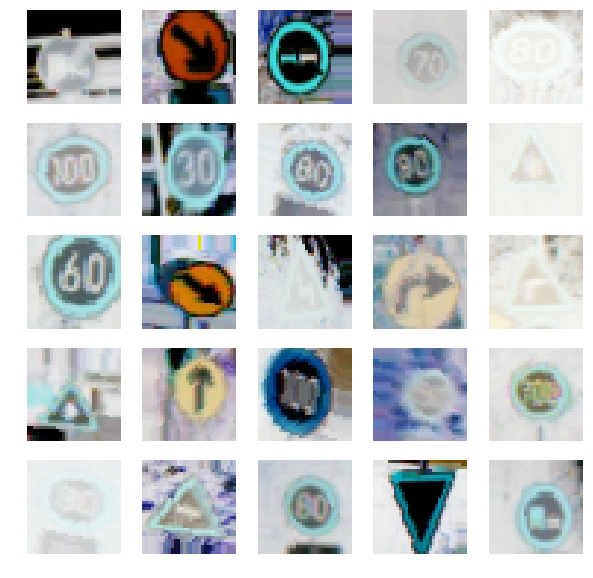

In [6]:
# Data Augmentation (Rotation, Flipping)

from skimage import exposure
from sklearn.utils import shuffle
from skimage.color import rgb2gray
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import cv2

%matplotlib inline

datagen = ImageDataGenerator(horizontal_flip=False, 
                             vertical_flip=False,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10.)
datagen.fit(X_train)

fig2, axes2 = plt.subplots(n_rows,n_cols,figsize=(10,10))

gen = datagen.flow(X_train, y_train, batch_size=25)

for j in range(n_rows):
    for k in range(n_cols):
        X_batch, y_batch = gen.next()
                
        for x in X_batch:
            axes2[j][k].set_axis_off()
            axes2[j][k].imshow(x)

assert(X_train.shape == (34799, 32, 32, 3))

/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


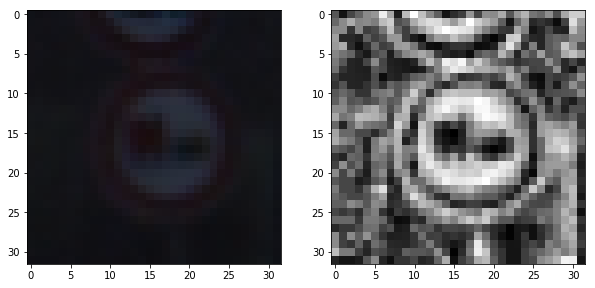

In [7]:
import random

x = X_train[17861]

def preprocess_image(x):
    x = rgb2gray(x)
    x = exposure.equalize_adapthist(x)

    return x.reshape((32, 32, 1))

fig3, axes3 = plt.subplots(1, 2,figsize=(10,10))
axes3[0].imshow(x, cmap = plt.get_cmap('gray'))
axes3[1].imshow(np.squeeze(preprocess_image(x)), cmap = plt.get_cmap('gray'))

In [8]:
### Preprocess dataset

# Run the jobs in parallel because life is short.

from joblib import Parallel, delayed

def preprocess_images(X):
    result = np.array(Parallel(n_jobs=-1, verbose=5, backend="multiprocessing")(map(delayed(preprocess_image), X)))
    return np.array(result)

X_train_preprocessed = preprocess_images(X_train)

assert(X_train_preprocessed.shape == (n_train, 32, 32, 1))

/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:    3.1s
[Parallel(n_job

In [9]:
### Preprocess validation examples

X_valid_preprocessed = preprocess_images(X_valid)

assert(X_valid_preprocessed.shape == (n_validation, 32, 32, 1)) 

/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed:    3.3s
[Parallel(n_job

In [10]:
### Generating more data via data augmentation

from tqdm import tqdm

# Number of images to generate for each class.
n_imgs_to_gen = 3000

X_train_aug = np.empty((0, 32, 32, 1))
y_train_aug = np.empty(0, dtype='uint8')

# Class IDs are given from 0 to n_classes
for cls in tqdm(range(0, n_classes)):
    index = y_train == cls
    x_train_cls = X_train_preprocessed[index]
    y_train_cls = y_train[index]
    
    # Copy the original images first
    X_train_aug_cls = np.copy(x_train_cls)
    y_train_aug_cls = np.copy(y_train_cls)
    
    for x, y in datagen.flow(x_train_cls, y_train_cls, batch_size=128):
        # add augmented images and ground truths
        X_train_aug_cls = np.append(X_train_aug_cls, x, axis=0)
        y_train_aug_cls = np.append(y_train_aug_cls, y, axis=0)
        
        if len(X_train_aug_cls) >= n_imgs_to_gen:
            break
    
    # Append just the right number of augmented images to make `n_imgs` 
    X_train_aug = np.append(X_train_aug, X_train_aug_cls[:n_imgs_to_gen], axis=0)
    y_train_aug = np.append(y_train_aug, y_train_aug_cls[:n_imgs_to_gen], axis=0)
        
# Check that we have the right number of images
assert(len(y_train_aug) == n_imgs_to_gen * n_classes)

X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)

100%|██████████| 43/43 [00:16<00:00,  2.01it/s]


<Container object of 1 artists>

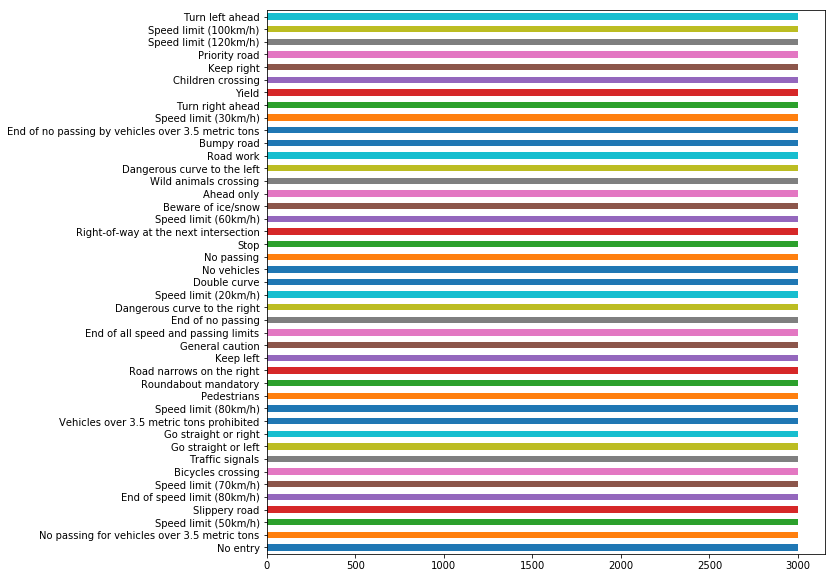

In [11]:
# Visualizing the **Augmented ** Dataset

import pandas as pd
import csv

reader = csv.reader(open('signnames.csv', 'r'))

d = {k: v for k, v in reader}
pd.value_counts([d[str(y)] for y in y_train_aug]).plot(kind="barh", figsize=(10, 10)).bar(10, 0)


### Model Architecture

In [12]:
### Compute output dimensions for conv layer

from math import ceil

# Given that padding is `VALID`

in_dim = 28
filter_dim = 1
stride = 2

out_dim = ceil(float(in_dim - filter_dim + 1) / float(stride))

print("{0}x{1}".format(out_dim, out_dim))


14x14


# Define your architecture here.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since the preprocessed traffic sign images are in grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 30x30x6.

**Activation.** ReLu.

**Pooling.** The output shape should be 15x15x6.

**Layer 2: Convolutional.** The output shape should be 13x13x16.

**Activation.** ReLu.

**Pooling.** The output shape should be 6x6x16.

**Layer 3: Convolutional.** The output shape should be 4x4x32.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 2x2x32.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`.

**Layer 4: Fully Connected.** This should have 100 outputs.

** Dropoout **

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected.** This should have 84 outputs.

** Dropoout **

**Activation.** Your choice of activation function.

**Layer 6: Fully Connected (Logits).** This should have 43 outputs.

** Dropoout **


### Output
Return the result of the 2nd fully connected layer.


In [13]:
EPOCHS = 50
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x):        
    # Arguments used for tf.truncated_normal, randomly defines
    # variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation
    conv1 = tf.nn.relu(conv1)
    
    print(conv1.get_shape())
    
    # Pooling: Input = 28x28x6. Output = 14x14x16
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    print(conv1.get_shape())
    
    #######
    
    # Layer 2: 
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation
    conv2 = tf.nn.relu(conv2)
    
    # Pooling: Input = 10x10x16. Output = 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #######
    
    # Flatten: Input = 5x5x16. Output = 400
    fc0 = flatten(conv2)
    
    # Dropout
    keep_prob_input = tf.placeholder(tf.float32)
    fc0_drop = tf.nn.dropout(fc0, keep_prob=keep_prob)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
        
    fc1   = tf.matmul(fc0_drop, fc1_W) + fc1_b
    
    # Activation
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    keep_prob_input = tf.placeholder(tf.float32)
    fc1_drop = tf.nn.dropout(fc1, keep_prob=keep_prob)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1_drop, fc2_W) + fc2_b
    
    # Activation
    fc2   = tf.nn.relu(fc2)
    
    # Dropout
    keep_prob_input = tf.placeholder(tf.float32)
    fc2_drop = tf.nn.dropout(fc2, keep_prob=keep_prob)
    
    # Layer 5: Fully Connect. Input = 84. Output = 43
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2_drop, fc3_W) + fc3_b
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

(?, 28, 28, 6)
(?, 14, 14, 6)


In [15]:
### Model Evalulation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    
    return total_accuracy / num_examples


In [16]:
### Train the model
from tqdm import tqdm

num_examples = len(y_train_aug)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Update the total number of examples
    num_examples = len(X_train_aug)
    
    print('Training ...')
    print()
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train_aug, y_train_aug)
        
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .75})
        
        # TODO: Training accuracy
        validation_accuracy = evaluate(X_valid_preprocessed, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        if validation_accuracy >= 0.98:
            break
        
    saver.save(sess, './lenet')
    print('Model saved!')

  0%|          | 0/1008 [00:00<?, ?it/s]

Training ...



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 1 ...
Validation Accuracy = 0.847



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 2 ...
Validation Accuracy = 0.903



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 3 ...
Validation Accuracy = 0.936



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 4 ...
Validation Accuracy = 0.933



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 5 ...
Validation Accuracy = 0.954



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 6 ...
Validation Accuracy = 0.958



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 7 ...
Validation Accuracy = 0.960



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 8 ...
Validation Accuracy = 0.959



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 9 ...
Validation Accuracy = 0.961



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 10 ...
Validation Accuracy = 0.958



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 11 ...
Validation Accuracy = 0.965



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 12 ...
Validation Accuracy = 0.967



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 13 ...
Validation Accuracy = 0.968



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 14 ...
Validation Accuracy = 0.971



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 15 ...
Validation Accuracy = 0.971



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 16 ...
Validation Accuracy = 0.969



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 17 ...
Validation Accuracy = 0.965



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 18 ...
Validation Accuracy = 0.971



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 19 ...
Validation Accuracy = 0.971



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 20 ...
Validation Accuracy = 0.970



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 21 ...
Validation Accuracy = 0.970



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 22 ...
Validation Accuracy = 0.972



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 23 ...
Validation Accuracy = 0.970



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 24 ...
Validation Accuracy = 0.971



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 25 ...
Validation Accuracy = 0.972



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 26 ...
Validation Accuracy = 0.973



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 27 ...
Validation Accuracy = 0.973



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 28 ...
Validation Accuracy = 0.972



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 29 ...
Validation Accuracy = 0.973



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 30 ...
Validation Accuracy = 0.969



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 31 ...
Validation Accuracy = 0.973



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 32 ...
Validation Accuracy = 0.973



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 33 ...
Validation Accuracy = 0.974



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 34 ...
Validation Accuracy = 0.973



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 35 ...
Validation Accuracy = 0.974



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 36 ...
Validation Accuracy = 0.974



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 37 ...
Validation Accuracy = 0.977



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 38 ...
Validation Accuracy = 0.972



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 39 ...
Validation Accuracy = 0.974



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 40 ...
Validation Accuracy = 0.976



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 41 ...
Validation Accuracy = 0.973



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 42 ...
Validation Accuracy = 0.975



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 43 ...
Validation Accuracy = 0.976



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 44 ...
Validation Accuracy = 0.976



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 45 ...
Validation Accuracy = 0.973



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 46 ...
Validation Accuracy = 0.974



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 47 ...
Validation Accuracy = 0.974



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 48 ...
Validation Accuracy = 0.971



  0%|          | 0/1008 [00:00<?, ?it/s]

EPOCH 49 ...
Validation Accuracy = 0.976



100%|██████████| 1008/1008 [00:03<00:00, 268.70it/s]


EPOCH 50 ...
Validation Accuracy = 0.975

Model saved!


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [17]:
### Preprocess test examples

X_test_preprocessed = preprocess_images(X_test)

assert(X_test_preprocessed.shape == (n_test, 32, 32, 1)) 


/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1464 tasks      | elapsed:    3.5s
[Parallel(n_job

### Load and Output the Images

In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_preprocessed, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.962


/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


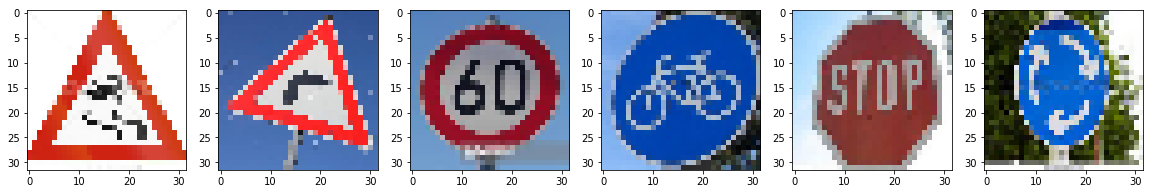

In [19]:
import os
import skimage.transform
from math import floor
from scipy import misc

dirname = 'test_images/'

n_rows = 1
n_cols = 6

fig, axes4 = plt.subplots(n_rows, n_cols,figsize=(20,20))

example_imgs = []

paths = sorted([os.path.join(dirname, path) for path in os.listdir(dirname) if path.endswith(".jpg")])

for idx, path in enumerate(paths):
    img = misc.imread(path)
    resized_img = skimage.transform.resize(img, (32, 32, 3))
    axes4[idx].imshow(resized_img)
    example_imgs.append(resized_img)
        
X_example = np.array(example_imgs)
y_example = np.array([23, 20, 3, 29, 14, 40])

### Predict the Sign Type for Each Image

In [20]:
X_example_preprocessed = preprocess_images(X_example)

assert(X_example_preprocessed.shape == (len(X_example), 32, 32, 1))

### Run the predictions here and use the model to output the prediction for each image.

/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/benjamintan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.

### Analyze Performance

In [21]:
### Calculate the accuracy for these 6 new images. 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_example_preprocessed, y_example)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.833


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    softmaxes = sess.run(tf.nn.softmax(logits), feed_dict={x: X_example_preprocessed, keep_prob: 1.0})

    values, indices = sess.run(tf.nn.top_k(softmaxes, k=5))
    saver.save(sess, './lenet.softmax')


INFO:tensorflow:Restoring parameters from ./lenet


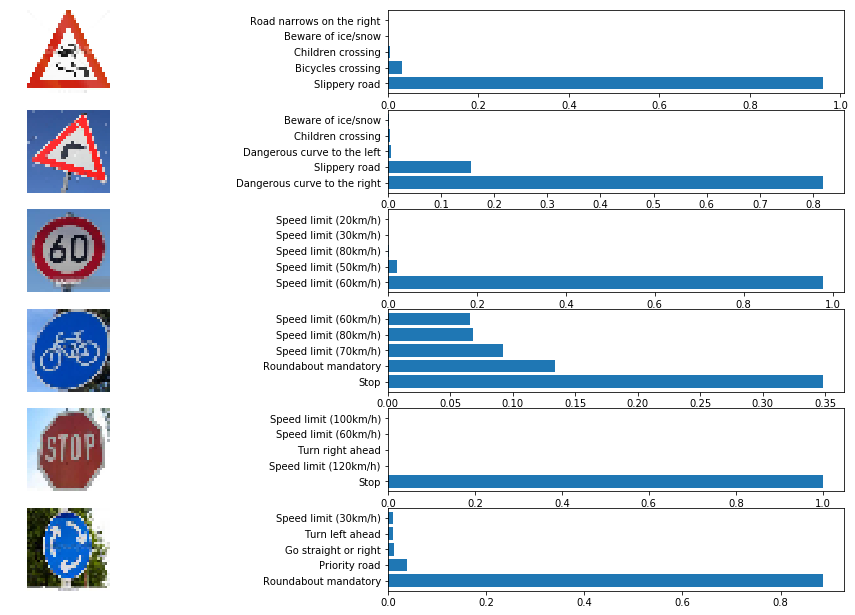

In [23]:
plt.figure(figsize=(18, 18))

for i in range(6):
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(X_example[i])
    plt.axis('off')

    plt.subplot(10, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), values[i, :])
    labels = [class_dict[str(ind)] for ind in indices[i]]
    plt.yticks(np.arange(1, 6, 1), labels)


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understanding the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [24]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, etc if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")